<a href="https://colab.research.google.com/github/mackenizm/COVID19/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Read data into DataFrame

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Data Science Projects/COVID19/train.csv')

Examine data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824194 entries, 0 to 824193
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              824194 non-null  int64  
 1   County          748034 non-null  object 
 2   Province_State  779688 non-null  object 
 3   Country_Region  824194 non-null  object 
 4   Population      824194 non-null  int64  
 5   Weight          824194 non-null  float64
 6   Date            824194 non-null  object 
 7   Target          824194 non-null  object 
 8   TargetValue     824194 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 56.6+ MB


In [6]:
df.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


Trim data after 17th May

In [0]:
df_trimmed = df[df['Date']<='2020-05-17']

Divide data into confirmed and fatal cases

In [0]:
confirmed = df_trimmed[df_trimmed['Target']=='ConfirmedCases']
fatal = df_trimmed[df_trimmed['Target']=='Fatalities']

Sum total across geographic regions and set datetime index

In [0]:
con = confirmed.groupby(confirmed['Date']).sum()
fat = fatal.groupby(fatal['Date']).sum()

In [0]:
con.drop(['Id','Population','Weight'],axis=1,inplace=True)
fat.drop(['Id','Population','Weight'],axis=1,inplace=True)

In [0]:
con = con.set_index(pd.to_datetime(con.index))
fat = fat.set_index(pd.to_datetime(fat.index))

Plot confirmed and fatal cases

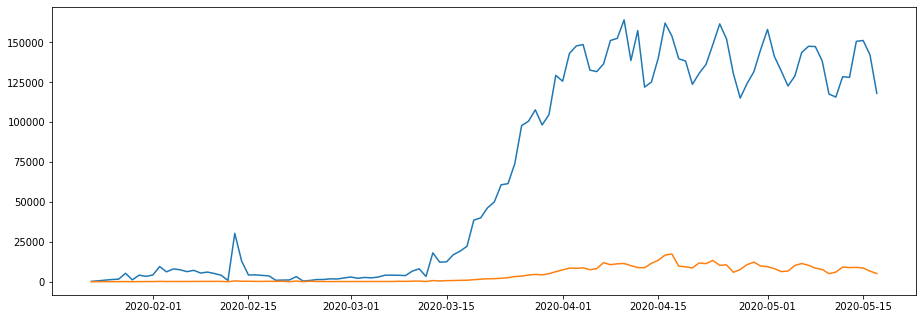

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.plot(con.index,con['TargetValue'])
ax.plot(fat.index,fat['TargetValue'])

Divide into train, test, and forecast sets

In [0]:
con_forecast = con['2020-05-11':]
con_test = con['2020-04-26':'2020-05-10']
con_train = con[:'2020-04-25']
fat_forecast = fat['2020-05-11':]
fat_test = fat['2020-04-26':'2020-05-10']
fat_train = fat[:'2020-04-25']

In [14]:
print(np.shape(con_forecast))
print(np.shape(con_test))
print(np.shape(con_train))
print(np.shape(fat_forecast))
print(np.shape(fat_test))
print(np.shape(fat_train))

(7, 1)
(15, 1)
(94, 1)
(7, 1)
(15, 1)
(94, 1)


Perform seasonal decompose analysis

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
con_train_decom = seasonal_decompose(con_train)
fat_train_decom = seasonal_decompose(fat_train)

In [0]:
con_train_trend = con_train_decom.trend
con_train_seasonal = con_train_decom.seasonal
con_train_residual = con_train_decom.resid
fat_train_trend = fat_train_decom.trend
fat_train_seasonal = fat_train_decom.seasonal
fat_train_residual = fat_train_decom.resid

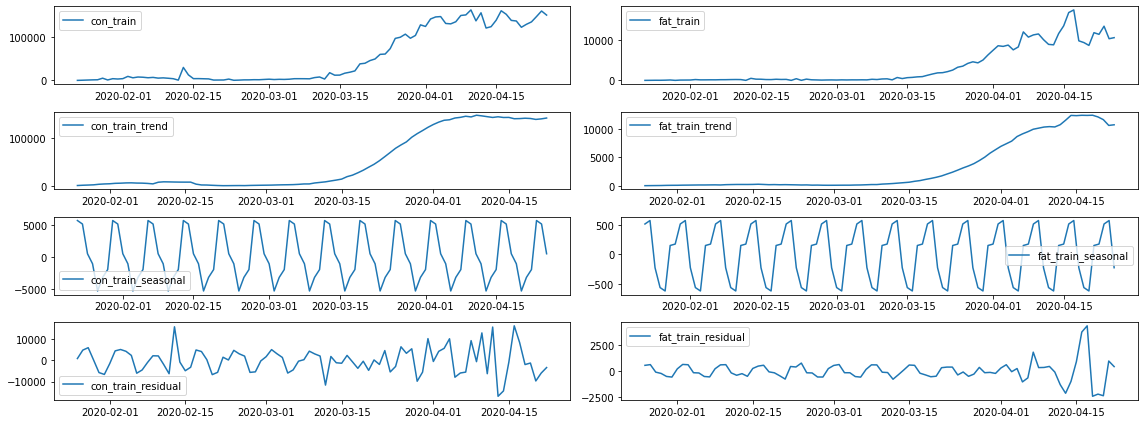

In [52]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(16,6))
axes[0,0].plot(con_train, label='con_train')
axes[0,0].legend()
axes[1,0].plot(con_train_trend, label='con_train_trend')
axes[1,0].legend()
axes[2,0].plot(con_train_seasonal, label='con_train_seasonal')
axes[2,0].legend()
axes[3,0].plot(con_train_residual, label='con_train_residual')
axes[3,0].legend()
axes[0,1].plot(fat_train, label='fat_train')
axes[0,1].legend()
axes[1,1].plot(fat_train_trend, label='fat_train_trend')
axes[1,1].legend()
axes[2,1].plot(fat_train_seasonal, label='fat_train_seasonal')
axes[2,1].legend()
axes[3,1].plot(fat_train_residual, label='fat_train_residual')
axes[3,1].legend()
plt.tight_layout()

Perform adfuller test to test stationarity. Non-Stationary if P-Value > 5%

In [0]:
from statsmodels.tsa.stattools import adfuller

In [20]:
print("p-value:", adfuller(con_train['TargetValue'])[1])

p-value: 0.8728217794064199


In [53]:
print("p-value:", adfuller(fat_train['TargetValue'])[1])

p-value: 0.18719190604736763


Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

In [0]:
from pandas.plotting import autocorrelation_plot

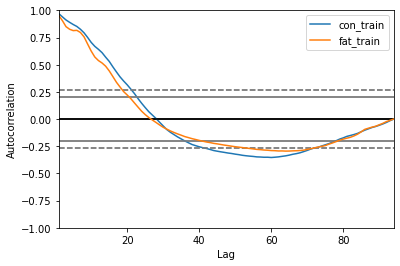

In [62]:
autocorrelation_plot(con_train, label='con_train')
autocorrelation_plot(fat_train, label='fat_train')
plt.legend()
plt.show()

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

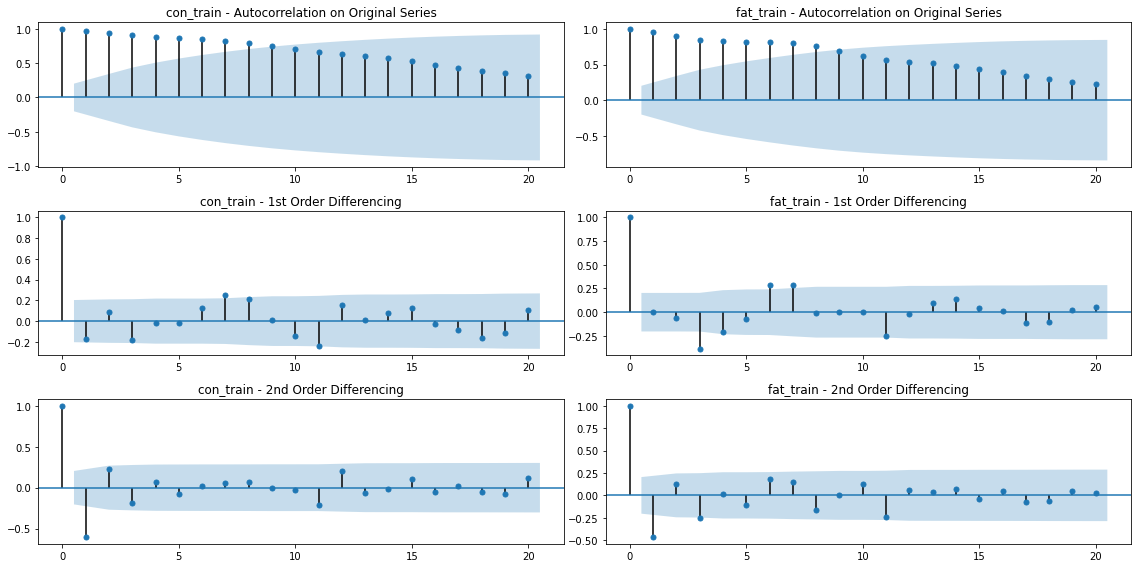

In [74]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(321)
fig = plot_acf(con_train, ax=ax1,
               title="con_train - Autocorrelation on Original Series") 
ax3 = fig.add_subplot(323)
fig = plot_acf(con_train.diff().dropna(), ax=ax3, 
               title="con_train - 1st Order Differencing")
ax5 = fig.add_subplot(325)
fig = plot_acf(con_train.diff().diff().dropna(), ax=ax5, 
               title="con_train - 2nd Order Differencing")
ax2 = fig.add_subplot(322)
fig = plot_acf(fat_train, ax=ax2,
               title="fat_train - Autocorrelation on Original Series") 
ax4 = fig.add_subplot(324)
fig = plot_acf(fat_train.diff().dropna(), ax=ax4, 
               title="fat_train - 1st Order Differencing")
ax6 = fig.add_subplot(326)
fig = plot_acf(fat_train.diff().diff().dropna(), ax=ax6, 
               title="fat_train - 2nd Order Differencing")
plt.tight_layout()

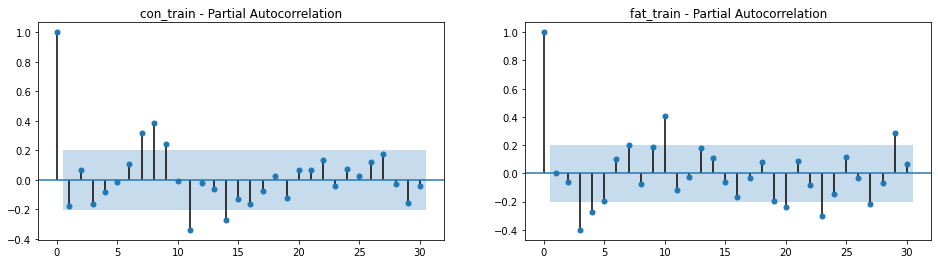

In [78]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
fig = plot_pacf(con_train.diff().dropna(), lags=30, ax=ax1, title="con_train - Partial Autocorrelation")
ax2 = fig.add_subplot(122)
fig = plot_pacf(fat_train.diff().dropna(), lags=30, ax=ax2, title="fat_train - Partial Autocorrelation")

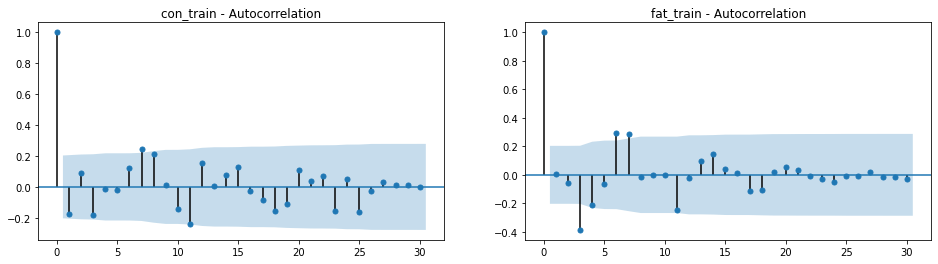

In [79]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
fig = plot_acf(con_train.diff().dropna(), lags=30, ax=ax1, title="con_train - Autocorrelation")
ax2 = fig.add_subplot(122)
fig = plot_acf(fat_train.diff().dropna(), lags=30, ax=ax2, title="fat_train - Autocorrelation")

Fit SARIMA model to training set

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
con_sarima = SARIMAX(con_train, order=(21,1,1), seasonal_order=(1,0,1,7))
con_sarima_results = con_sarima.fit()
con_sarima_results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        TargetValue   No. Observations:                   94
Model:             SARIMAX(21, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -954.220
Date:                            Tue, 26 May 2020   AIC                           1958.439
Time:                                    09:07:47   BIC                           2021.754
Sample:                                01-23-2020   HQIC                          1984.004
                                     - 04-25-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0518      4.453      0.012      0.991      -8.676       8.779
ar.L2          0.2133      2.259      0.094      0.925      -4.215       4.642
ar.L3         -0.0160      0.355     -0.045      0.964      -0.713       0.681
ar.L4          0.1257      0.267      0.471      0.638      -0.398       0.649
ar.L5          0.1052      0.557      0.189      0.850      -0.986       1.197
ar.L6          0.2464      0.743      0.331      0.740      -1.210       1.703
ar.L7         -0.6554      1.534     -0.427      0.669      -3.662       2.351
ar.L8          0.2857      2.116      0.135      0.893      -3.861       4.432
ar.L9          0.2322      0.190      1.221      0.222      -0.141       0.605
ar.L10        -0.2385      1.058     -0.225      0.822      -2.313       1.836
ar.L11        -0.1817      0.483     -0.377      0.707      -1.127       0.764
ar.L12         0.2001      1.106      0.181      0.856      -1.967       2.367
ar.L13         0.2383      0.311      0.767      0.443      -0.371       0.847
ar.L14        -0.0149      1.173     -0.013      0.990      -2.313       2.283
ar.L15         0.2817      0.737      0.382      0.702      -1.163       1.726
ar.L16         0.0728      1.630      0.045      0.964      -3.123       3.268
ar.L17        -0.3557      1.205     -0.295      0.768      -2.718       2.006
ar.L18        -0.3385      0.915     -0.370      0.712      -2.133       1.456
ar.L19         0.0448      2.125      0.021      0.983      -4.119       4.209
ar.L20         0.0838      0.986      0.085      0.932      -1.849       2.017
ar.L21        -0.0144      0.248     -0.058      0.954      -0.501       0.473
ma.L1         -0.5551      4.423     -0.126      0.900      -9.223       8.113
ar.S.L7        0.2756      0.385      0.717      0.474      -0.478       1.029
ma.S.L7        0.8337      0.294      2.837      0.005       0.258       1.410
sigma2      4.269e+07   2.76e-06   1.55e+13      0.000    4.27e+07    4.27e+07
===================================================================================
Ljung-Box (Q):                       11.43   Jarque-Bera (JB):                59.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             1.16
Prob(H) (two-sided):                  0.28   Kurtosis:                         6.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.93e+28. Standard errors may be unstable.
"""

In [90]:
fat_sarima = SARIMAX(fat_train, order=(19,1,1), seasonal_order=(1,0,1,7))
fat_sarima_results = fat_sarima.fit()
fat_sarima_results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        TargetValue   No. Observations:                   94
Model:             SARIMAX(19, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -755.745
Date:                            Tue, 26 May 2020   AIC                           1557.490
Time:                                    09:08:02   BIC                           1615.740
Sample:                                01-23-2020   HQIC                          1581.010
                                     - 04-25-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6478      0.723      0.895      0.371      -0.770       2.066
ar.L2          0.1438      0.212      0.678      0.498      -0.272       0.560
ar.L3         -0.4854      0.207     -2.346      0.019      -0.891      -0.080
ar.L4          0.1939      0.349      0.555      0.579      -0.491       0.879
ar.L5          0.1103      0.221      0.499      0.618      -0.323       0.544
ar.L6          0.3366      0.195      1.730      0.084      -0.045       0.718
ar.L7         -0.4810      1.211     -0.397      0.691      -2.855       1.893
ar.L8          0.1732      0.875      0.198      0.843      -1.541       1.888
ar.L9          0.3268      0.188      1.739      0.082      -0.042       0.695
ar.L10         0.3562      0.626      0.569      0.570      -0.871       1.584
ar.L11        -0.7245      0.548     -1.322      0.186      -1.799       0.350
ar.L12         0.2556      0.448      0.570      0.569      -0.623       1.135
ar.L13         0.4869      0.610      0.798      0.425      -0.709       1.683
ar.L14        -0.3176      0.764     -0.416      0.677      -1.814       1.179
ar.L15        -0.0164      0.341     -0.048      0.962      -0.685       0.652
ar.L16        -0.0736      0.709     -0.104      0.917      -1.462       1.315
ar.L17         0.1011      0.596      0.170      0.865      -1.067       1.269
ar.L18        -0.2861      0.943     -0.304      0.761      -2.133       1.561
ar.L19        -0.0656      1.062     -0.062      0.951      -2.148       2.017
ma.L1         -0.8586      0.721     -1.191      0.234      -2.271       0.554
ar.S.L7        0.6803      1.631      0.417      0.677      -2.516       3.876
ma.S.L7       -0.1743      2.585     -0.067      0.946      -5.241       4.892
sigma2      5.378e+05   1.19e+05      4.517      0.000    3.04e+05    7.71e+05
===================================================================================
Ljung-Box (Q):                       11.02   Jarque-Bera (JB):                63.00
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              43.15   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
start = len(con_train)
end = len(con_train) + len(con_test) - 1

Predict and plot for test set with SARIMA model

In [0]:
con_predict = con_sarima_results.predict(start,end,type='levels').rename('Confirmed SARIMA Predictions')
fat_predict = fat_sarima_results.predict(start,end,type='levels').rename('Fatal SARIMA Predictions')

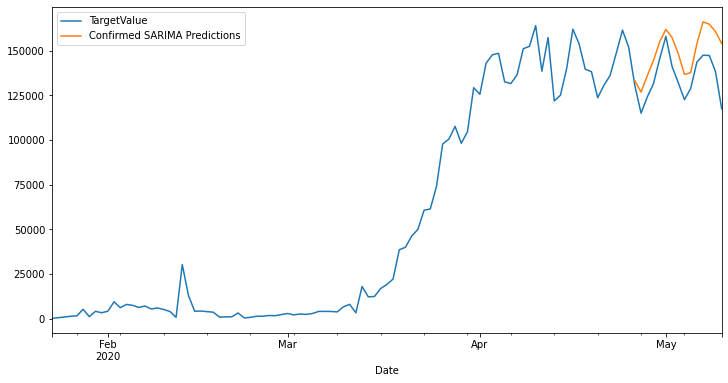

In [93]:
con_train.append(con_test).plot(legend=True,figsize=(12,6))
con_predict.plot(legend=True)

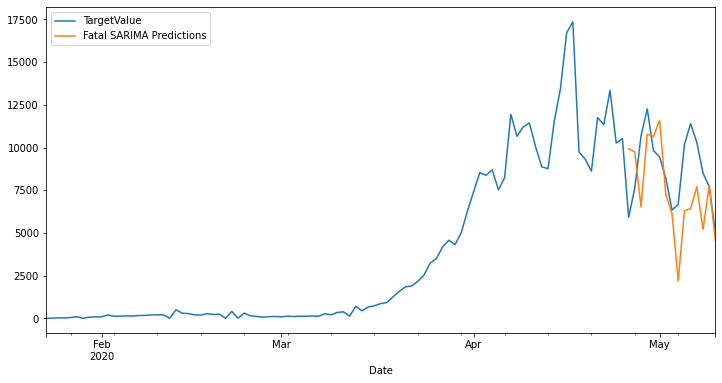

In [94]:
fat_train.append(fat_test).plot(legend=True,figsize=(12,6))
fat_predict.plot(legend=True)

Predict and plot for forecast set with SARIMA model

In [0]:
start = len(con_train) + len(con_test)
end = len(con_train) + len(con_test) + len(con_forecast) - 1

In [96]:
con_sarima_fc = SARIMAX(con_train.append(con_test), order=(21,1,1), seasonal_order=(1,0,1,7))
con_sarima_fc_results = con_sarima_fc.fit()
con_fc = con_sarima_fc_results.predict(start,end,type='levels').rename('Confirmed SARIMA Forecast')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [97]:
fat_sarima_fc = SARIMAX(fat_train.append(fat_test), order=(21,1,1), seasonal_order=(1,0,1,7))
fat_sarima_fc_results = fat_sarima_fc.fit()
fat_fc = fat_sarima_fc_results.predict(start,end,type='levels').rename('Fatal SARIMA Forecast')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


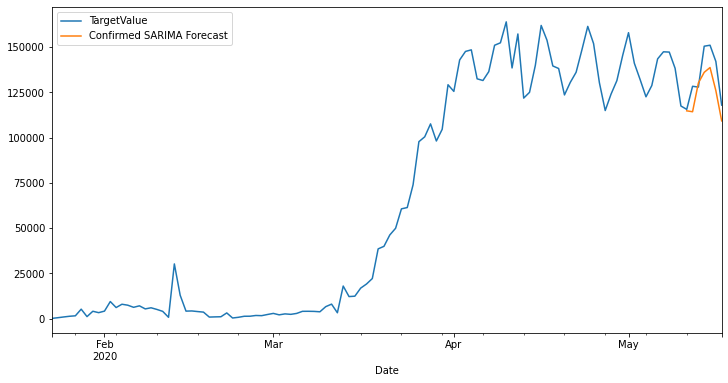

In [98]:
con.plot(legend=True,figsize=(12,6))
con_fc.plot(legend=True)

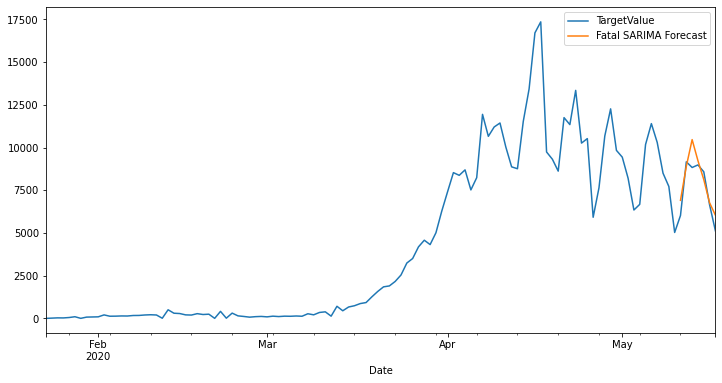

In [99]:
fat.plot(legend=True,figsize=(12,6))
fat_fc.plot(legend=True)